Code: https://github.com/dataquestio/project-walkthroughs/blob/master/sp_500/market_prediction.ipynb
Video: https://youtu.be/1O_BenficgE?si=pPSiTyJhxNhc6dqZ

### Import libraries and obtain data

In [2]:
import yfinance as yf #import the Yahoo Finance library to obtain financial data
import pandas as pd

In [3]:
sp500 = yf.Ticker("^GSPC") # store data in variable for the S&P500 index with ticker symbol ^GSPC
sp500 = sp500.history(period="max") # obtain historical data for S&P500 from the max period of time - when it was created until now
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,0.0,0.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,0.0,0.0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,0.0,0.0


### Clean and Visualize stock market data

<Axes: xlabel='Date'>

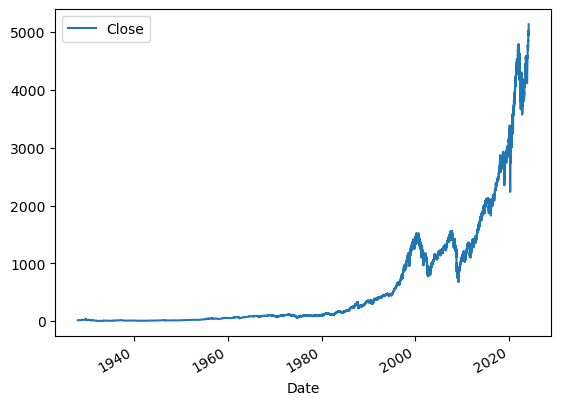

In [4]:
# plot the closing price on y-axis against the index (the trading day) on x-axis to get S&P price history
# !!make this plot nicer - add labels
sp500.plot.line(y="Close", use_index=True)

In [5]:
# delete the unecessary columns like Dividends and Stock Splits (are more appropriate for individual stocks, not indices)
# or sp500.drop(['Dividends', 'Stock Splits'], axis=1)
del sp500['Dividends']
del sp500['Stock Splits']
sp500


,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000


### Set up target for Machine Learning
the target is what we're actually predicting - will the price go up or down tomorrow? (not predicting the absolute price)

In [6]:
# Create new column for tomorrow's price. The shift method takes the close column and shifts all prices back one day,
# and inputs those values into the Tomorrow column to give the closing price of the next day
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020


In [7]:
# Set up target to predict with ML. Returns a boolean indicating if tomorrow's price
# is greater than today's closing price, then converts into an integer to be able to use it in ML
# returns 1 if price went up, 0 if price went down
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1


In [8]:
# Remove all data from before 1990, since very old data may not be useful in making future predictions, as the market could've shifted greatly
# .copy() method avoids the warning message from pandas from trying to subset a dataframe, then later assign back to it
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1


### Training an Initital Machine Learning Model

In [9]:
#using random forest model works by training a bunch of individual decision trees with randomized parameters
# then averaging the results from those decision trees. Thus, random forests are resistant to overfitting.
# They can still overfit, but it's harder than in other mdoels. They also run relatively quickly cna can pick up non-linear tendencies within the dat
# and most relatinoships in stock prices are non-linear, ex. open price and target is not linear relationship
from sklearn.ensemble import RandomForestClassifier

#initialize model. n_estimarotrs is the number of individual decision tress we want to train
# the higher the n_estimators, generaly the better the accuracy, up to a limit.
# min_samples_split helps protect against overfitting. the higher its set, the less accurate the model, but the less it'll overfit
# random_state: random models that are generated will be in a predictible sequence each time
# so if we rerun the model twice, we'll get the same results - helps when testing improvements to the model
model = RandomForestClassifier(n_estimators=100,min_samples_split=100, random_state=1)

#split data into train and test set. Since our data is a time series data, we shouldn't use train-test splits or cross validation
# since it doesn't take into account time series nature of data, as it uses future data to predict the past
# this results in "leakage" where you're leaking info into the model - meaning if the model already knows what
# the stock price will be next week, it'll do a much better job at predicting tmrw's stock price than if it didn't know anything else
# so instead, we want the model to actually learn how to predict the stock price

# first 100 rows in train and last 100 in test set
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) # where x = the predictors, y = the targeet we're trying to predict


RandomForestClassifier(min_samples_split=100, random_state=1)

### Meaure model accuracy


In [10]:
# when we said the market would go up, did it actually go up? What percentage of the time when we said the market would go up did it actually go up
# le for predicting stoks since we want the price to go up after we buy it 
from sklearn.metrics import precision_score

preds = model.predict(test[predictors]) # this is a numpy array
preds

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
test

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2023-10-09 00:00:00-04:00,4289.020020,4341.729980,4283.790039,4335.660156,3174630000,4358.240234,1
2023-10-10 00:00:00-04:00,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,4376.950195,1
2023-10-11 00:00:00-04:00,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,4349.609863,0
2023-10-12 00:00:00-04:00,4380.939941,4385.850098,4325.430176,4349.609863,3713140000,4327.779785,0
2023-10-13 00:00:00-04:00,4360.490234,4377.100098,4311.970215,4327.779785,3566560000,4373.629883,1
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1


In [12]:
# since it's an array, covert into series with the date as the index (same index)
preds = pd.Series(preds, index=test.index)
preds

Date
2023-10-09 00:00:00-04:00    0
2023-10-10 00:00:00-04:00    1
2023-10-11 00:00:00-04:00    1
2023-10-12 00:00:00-04:00    1
2023-10-13 00:00:00-04:00    1
                            ..
2024-02-26 00:00:00-05:00    0
2024-02-27 00:00:00-05:00    0
2024-02-28 00:00:00-05:00    0
2024-02-29 00:00:00-05:00    0
2024-03-01 00:00:00-05:00    0
Length: 100, dtype: int64

In [13]:
# precision score using the actual target and the predicted target
precision_score(test["Target"], preds)

0.5172413793103449

this precision_score means that whe we said the stock price would go up, it only went up 55% of the time

<Axes: xlabel='Date'>

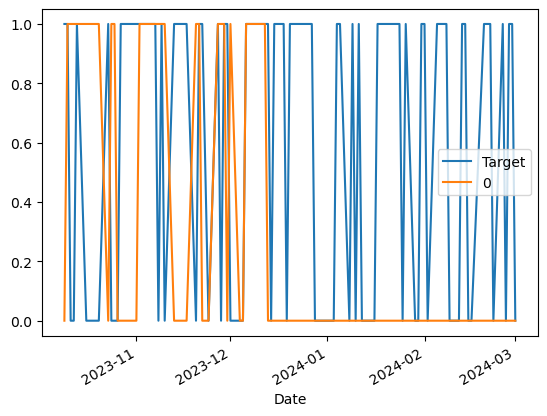

In [14]:
# plot predictions. combine actual values (test) with predicted values
combined = pd.concat([test["Target"], preds], axis=1) # axis=1 means trest each of the inputs as a column
combined.plot()

orange line is our predictions and the blue line is what actually happened

### Building a Backtesting system
instead of using data from last 100days, be able to test across multiple years. Evaluate error and create a way to back test to accurately meaure that error over long periods of time

In [15]:
# basically a summary of all the steps above
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [39]:
# start=2500: we want to have a certain amount of data to train the first model. Every trading year has ~250 days. So, 2500 days (10 years) of data and train first model with this data
# step=250: train a model for about a year, then goi to the next year, and so on (since ~250 days in trading year)
# ie. take first 10 years of data and predict values fr the 11th year, then take first 11 years of data and predict values for 12th year, etc.
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = [] #  list of data frames, each df is the prediction for a single year
    for i in range(start, data.shape[0], step): # loops across the data year by year to make predictions for all of the years (except first ~10)
        train = data.iloc[0:i].copy() # all years prior to the current year
        test = data.iloc[i: (i+step)].copy()
        predictions = predict(train, test, predictors, model) # the current year
        all_predictions.append(predictions) # add predictions to list

    return pd.concat(all_predictions) # takes a list of data frames and combines them into a single df

In [40]:
predictions = backtest(sp500, model, predictors)

In [18]:
predictions

,Target,Predictions
Date,,
2023-10-09 00:00:00-04:00,1,0
2023-10-10 00:00:00-04:00,1,0
2023-10-11 00:00:00-04:00,0,0
2023-10-12 00:00:00-04:00,0,0
2023-10-13 00:00:00-04:00,1,0
...,...,...
2024-02-26 00:00:00-05:00,1,0
2024-02-27 00:00:00-05:00,0,0
2024-02-28 00:00:00-05:00,1,0


In [41]:
#counts how many times each type of prediction was made 
predictions["Predictions"].value_counts()

Predictions
0.0    3262
1.0     844
Name: count, dtype: int64

predicted market would go down 2292 days and go up 208 days

In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5355450236966824

Across all 2292 + 208 trading days, we are about 58% accurate  (meaning when we said the market would go up, it went up 58% of the time)

In [43]:
# used as a benchmark. THe percentage of days when the market actually went up
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.541403
0    0.458597
Name: count, dtype: float64

61% of the time (within the days we are looking at), it went up 

### Adding additional Predictors to increase accuracy

In [44]:
# horizions in which we want to look at the mean close price, ex. look at last 2 days, last 5 days (week), last 60 days, last year, last 4 years
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean() # mean of  the rolling average agaist the horizon

    ratio_column = "Close_Ratio_{0}".format(horizon)
    #f'Close_Ratio_{horizon}' # column named "Close_Ratio_2", "Close_Ratio_5", etc. for each horizon
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] #ex. first loop: ratio btwn tdy's close and average close in last 2 days, second loop: ratio bwtn tdy's close and the avg close in the last 5 days, etc.

    trend_column = f"Trend_{horizon}" 
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] # takes rolling avg sum of the Target (number of days the stock price actually went up) in all the days before it. 
        #ex. for horizon 5, in any row, will take the rolling avg sum of the Target from that 5th day and the 4 days before it
    new_predictors += [ratio_column, trend_column]

new_predictors


/var/folders/76/ntr1tc2n1zv3ycbkp_f870600000gn/T/ipykernel_93616/4146960231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] #ex. first loop: ratio btwn tdy's close and average close in last 2 days, second loop: ratio bwtn tdy's close and the avg close in the last 5 days, etc.
/var/folders/76/ntr1tc2n1zv3ycbkp_f870600000gn/T/ipykernel_93616/4146960231.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500[trend_column] = sp500.shift(1)

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [45]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26 00:00:00-05:00,950.820007,956.469971,950.820007,951.640015,487750000,955.400024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-11-28 00:00:00-05:00,951.640015,959.130005,951.640015,955.400024,189070000,974.770020,1,1.001972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-01 00:00:00-05:00,955.400024,974.770020,955.400024,974.770020,590300000,971.679993,0,1.010035,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-02 00:00:00-05:00,974.780029,976.200012,969.830017,971.679993,576120000,976.770020,1,0.998412,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-12-03 00:00:00-05:00,971.679993,980.809998,966.159973,976.770020,624610000,973.099976,0,1.002612,1.0,1.011095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,5069.529785,0,1.000174,2.0,1.012144,3.0,1.059453,38.0,1.153423,141.0,1.262368,532.0
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1,0.998103,1.0,1.005753,3.0,1.053559,37.0,1.147924,140.0,1.256950,532.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0,1.000852,1.0,1.003381,4.0,1.053432,38.0,1.148730,141.0,1.258437,533.0


when pandas cannot find enough rows (in this case, days) prior to the current row to compute the rolling average, it'll just return NaN.
Same thing for "Trend" because it doesn't include the current day

In [46]:
# drop all rows that contain an NaN
sp500 = sp500.dropna()
sp500
# notice starts in 1993, so we needed about 4 years of data to actually compute te rolling averages

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2001-11-20 00:00:00-05:00,1151.060059,1152.449951,1142.170044,1142.660034,1330200000,1137.030029,0,0.996338,1.0,0.999559,3.0,1.048050,29.0,0.939880,120.0,0.910431,504.0
2001-11-21 00:00:00-05:00,1142.660034,1142.660034,1129.780029,1137.030029,1029300000,1150.339966,1,0.997530,0.0,0.995362,2.0,1.043337,28.0,0.935960,120.0,0.905814,503.0
2001-11-23 00:00:00-05:00,1137.030029,1151.050049,1135.900024,1150.339966,410300000,1157.420044,1,1.005819,1.0,1.005588,2.0,1.055740,29.0,0.947516,121.0,0.916289,503.0
2001-11-26 00:00:00-05:00,1150.339966,1157.880005,1146.170044,1157.420044,1129800000,1149.500000,0,1.003068,2.0,1.008467,3.0,1.062685,29.0,0.953945,121.0,0.921792,504.0
2001-11-27 00:00:00-05:00,1157.420044,1163.380005,1140.810059,1149.500000,1288000000,1128.520020,0,0.996567,1.0,1.001839,2.0,1.055893,29.0,0.947957,121.0,0.915359,503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,5069.529785,0,1.000174,2.0,1.012144,3.0,1.059453,38.0,1.153423,141.0,1.262368,532.0
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1,0.998103,1.0,1.005753,3.0,1.053559,37.0,1.147924,140.0,1.256950,532.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0,1.000852,1.0,1.003381,4.0,1.053432,38.0,1.148730,141.0,1.258437,533.0


### Improving our Model

In [47]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
new_predictors
#increasing estimators and decrasing min sample split

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [48]:
# same function as above. old:
#def predict(train, test, predictors, model):
    #model.fit(train[predictors], train["Target"])
    #preds = model.predict(test[predictors])
    #preds = pd.Series(preds, index=test.index, name="Predictions")
    #combined = pd.concat([test["Target"], preds], axis = 1)
    #return combined

# now, we change definition on what becomes a "1" and what becomes a "0". Instead of .predict method, we use.predict_proba to compute the 
# probability that the row will be a "1" or "0", meaning the probability the stock price will go down or up tomorrow (which is the second column, as it outputs
# an array containing 2 probabilites: [p of Target = 0, p of Target = 1])

# then, redifine that if the class probability is greater than 0.6 (instead of the default 0.5) then it's considered a "1"
# this means the model has to be more confident that the price will go up in order to actually show that the price will go up. 

# this reduces the total number of trading days, ie. the number of das it predicts the price will go up, but it'll increase the chance that the price
# will actually go up on those days - better since in reality, we don't want to make a ton of trades - we want to know that when we make a trade the price will actually go up
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [50]:
predictions = backtest(sp500, model, new_predictors)
# backtesting. Notice we got rid of the "Close", "Open", "High", "Low", "Volumn" columns since they're just absollute numbers that aren't informative to the model. Ie. if
# the price today is 465, it doesn't tell us anthing about whether the price will go up or down tmrw. The ratios are the most informative part (the price tdy compared to the price last week)
predictions

,Target,Predictions
Date,,
2011-10-25 00:00:00-04:00,1,1.0
2011-10-26 00:00:00-04:00,1,0.0
2011-10-27 00:00:00-04:00,1,0.0
2011-10-28 00:00:00-04:00,0,0.0
2011-10-31 00:00:00-04:00,0,1.0
...,...,...
2024-02-23 00:00:00-05:00,0,0.0
2024-02-26 00:00:00-05:00,1,0.0
2024-02-27 00:00:00-05:00,0,0.0


In [52]:
predictions["Predictions"].value_counts()

Predictions
0.0    2633
1.0     473
Name: count, dtype: int64

predicted market price would go down 2633 days and up 473 days  as opposed to the 3262 (0) 844 (1) days before since we changed the threshold and made the model be more confident in its predictions. Thus, we're trading/buying stock on fewer days

In [53]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5095137420718816

In [54]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.541211
0    0.458789
Name: count, dtype: float64

when the model predcts the price will go up, 51% of the time it will actually go up. From our baseline (same as before we chaged the model), the stock went up 54% of the days, but from our model, the days that it says to buy, the price actually goes up 51% of the time

Other ways to improve the model: add in
- news articles about the sp500
- macroeconomic conditions: inflation, interest rates, etc.
- Key components of the sp500: key stocks, key sectors (if tech is in a downtown, maybe sp500 will go down in the future)
- increase resoltuion: in this model we look at daiy data, but try looking at hourly data, minute, etc.